# Step 1: Inspect the datasets

In [ ]:
import pandas as pd
import glob
import os

path = "dataset"
files = glob.glob(os.path.join(path, "*.csv"))

# Dictionary to store columns for each file
schema_check = {}

for file in files:
    fname = os.path.basename(file)
    # read only the header row
    cols = pd.read_csv(file, nrows=0).columns.tolist()
    schema_check[fname] = cols

# Print schema differences
for fname, cols in schema_check.items():
    print(f"\n{fname}:")
    print(cols)

# Compare sets of columns
all_columns = [set(cols) for cols in schema_check.values()]
unique_columns = set.union(*all_columns)
common_columns = set.intersection(*all_columns)

print("\n✅ Common columns across all files:")
print(sorted(common_columns))

print("\n⚠️ Columns not present in every file:")
for col in unique_columns - common_columns:
    print(col)


In [288]:
import pandas as pd
import glob
import os

# path where your monthly CSVs are stored
path = "dataset/"  
files = glob.glob(os.path.join(path, "*.csv"))

df_list = []

for file in files:
    # extract year-month from filename
    # Example: "202104-divvy-tripdata.csv" → "2021-04"
    fname = os.path.basename(file)
    year_month = fname.split('-')[0]  # before first '-'
    year_month = year_month[:4] + "-" + year_month[4:]  # format YYYY-MM

    # read CSV
    temp = pd.read_csv(file)

    # add year_month column
    temp["year_month"] = year_month

    df_list.append(temp)

# unify into one dataframe
df = pd.concat(df_list, ignore_index=True)

# convert date columns
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

print(df.shape)
print(df.columns)
print(df["year_month"].unique()[:5])  # first few unique months


(5723532, 14)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year_month'],
      dtype='object')
['2021-09' '2021-04' '2021-07' '2021-11' '2021-12']


In [65]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year_month
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual,2021-09
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual,2021-09
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual,2021-09
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual,2021-09
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual,2021-09


# Stations having too much null values
Roughly 10–20% of trips have missing station information, mostly due to dockless rides. Since latitude/longitude data is available for nearly all trips, we retained these records and treated missing station IDs as a separate category (‘Unknown’). This ensures no loss of valuable trip data while acknowledging system design differences.

# Missing values

In [295]:
# columns to compute missing % on (exclude the group key)
cols = [c for c in df.columns if c != "year_month"]

missing_summary = (
    df[cols].isna()
      .groupby(df["year_month"])
      .mean()
      .mul(100)
      .round(2)
      .rename_axis("year_month")   # name the index
      .reset_index()               # safe now—no duplicate col
)
missing_summary

,year_month,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
0,2021-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
1,2021-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
2,2021-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
3,2021-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
4,2021-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
5,2021-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
6,2021-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
7,2021-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02
8,2021-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
9,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


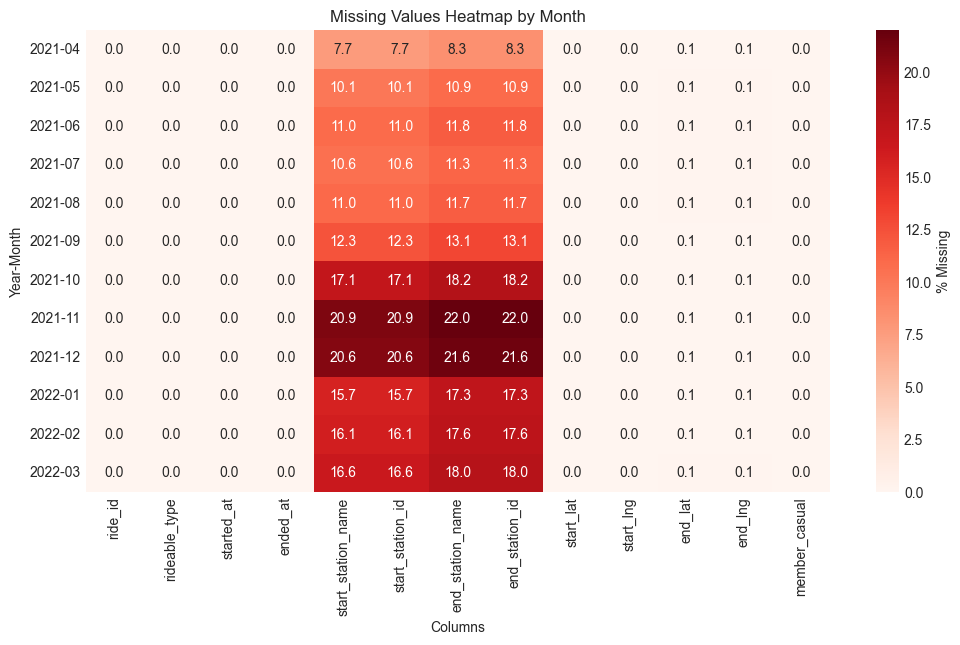

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the missing_summary you already created
# Set year_month as index so it's in the rows
heatmap_data = missing_summary.set_index("year_month")

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,        # show % values inside cells
    fmt=".1f",         # 1 decimal place
    cmap="Reds",       # red color map (intuitive for missing)
    cbar_kws={'label': '% Missing'}
)

plt.title("Missing Values Heatmap by Month")
plt.ylabel("Year-Month")
plt.xlabel("Columns")
plt.savefig("./Preprocessing/missing_values_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()



### Summary of Missing Values  

The missing values in the *start_station_name* and *end_station_name* columns are not data errors, but rather reflect how different bike types operate. Cyclistic offers three types of bikes:

- **Classic Bikes** – must be returned to a docking station.  
- **Docked Bikes** – picked up and returned at specific docking stations.  
- **Electric Bikes** – can be parked anywhere within the service area.  

Because electric bikes do not require docking, their rides often lack station information.  
This explains the observed missing values in the station-related columns.  


In [296]:
df_docked = df[df["rideable_type"] == "docked_bike"]
# columns to compute missing % on (exclude the group key)
cols = [c for c in df.columns if c != "year_month"]

missing_summary_docked = (
    df_docked[cols].isna()
      .groupby(df_docked["year_month"])
      .mean()
      .mul(100)
      .round(2)
      .rename_axis("year_month")   # name the index
      .reset_index()               # safe now—no duplicate col
)
missing_summary_docked

,year_month,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
0,2021-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,2021-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,2021-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,2021-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,2021-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5,2021-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
6,2021-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
7,2021-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
8,2021-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
9,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [292]:
# Assign "Unknown" to missing station names and IDs
station_cols = ["start_station_name", "start_station_id", 
                "end_station_name", "end_station_id"]

df[station_cols] = df[station_cols].fillna("Unknown")

# Check if it worked
print(df[station_cols].isna().sum())
df[station_cols].head()


start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
dtype: int64


,start_station_name,start_station_id,end_station_name,end_station_id
0,Unknown,Unknown,Unknown,Unknown
1,Unknown,Unknown,Unknown,Unknown
2,Unknown,Unknown,Unknown,Unknown
3,Unknown,Unknown,Unknown,Unknown
4,Unknown,Unknown,Unknown,Unknown


# Feature Engineering

In [293]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df["ride_distance_km"] = haversine(df["start_lat"], df["start_lng"], df["end_lat"], df["end_lng"])

season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
}

df["ride_duration_min"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60
df["start_hour"] = df["started_at"].dt.hour
df["start_day"] = df["started_at"].dt.day_name()
df["start_month"] = df["started_at"].dt.month
df["start_week"] = df["started_at"].dt.isocalendar().week
df["is_weekend"] = df["started_at"].dt.dayofweek >= 5


df["season"] = df["start_month"].map(season_map)

df["is_rush_hour"] = df["start_hour"].between(7,9) | df["start_hour"].between(16,19)
df["duration_category"] = pd.cut(df["ride_duration_min"],
                                 bins=[0,10,30,60,120, np.inf],
                                 labels=["<10","10-30","30-60","60-120","120+"])


In [214]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year_month
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual,2021-09
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual,2021-09
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual,2021-09
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual,2021-09
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual,2021-09


# Outlier Detection 

In [298]:
idx

'member'

Robust threshold ≈ 138.9 min (log+MAD)


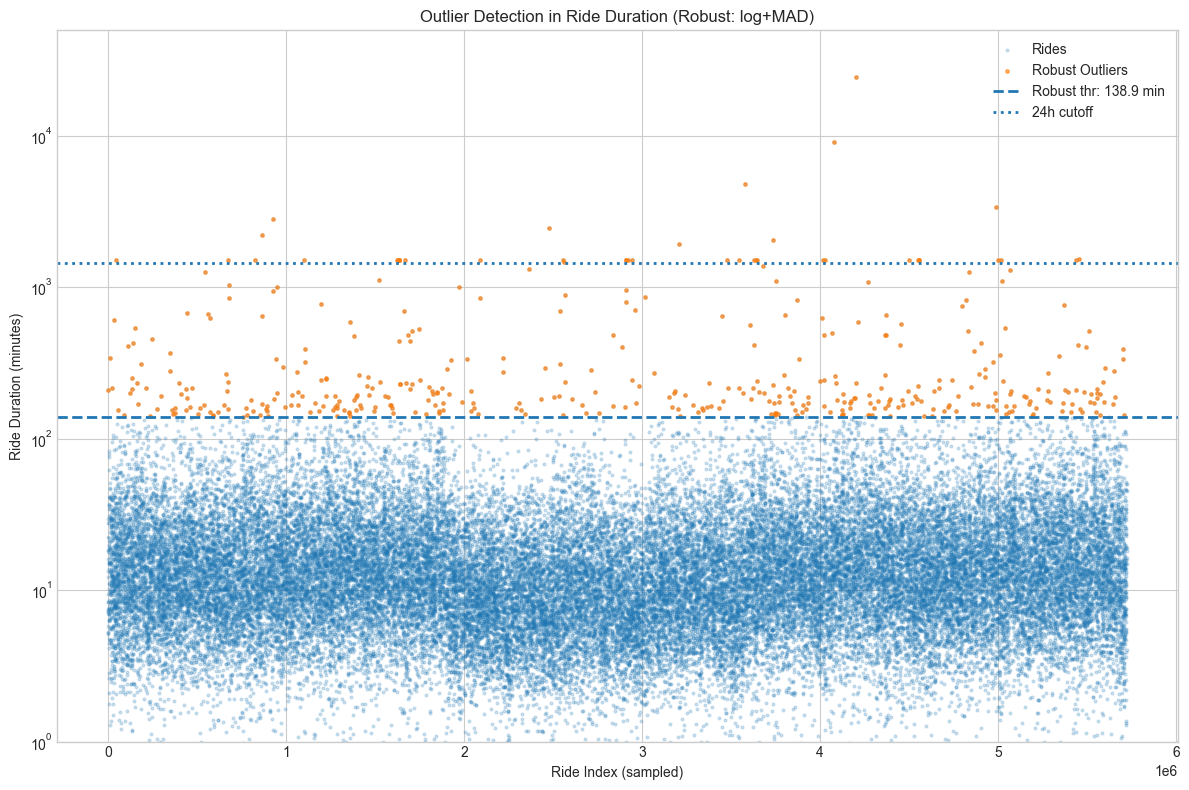

In [302]:
from scipy.stats import median_abs_deviation

# Log-transform to reduce skew
log_dur = np.log1p(df["ride_duration_min"].clip(lower=0))
med = np.nanmedian(log_dur)
mad = median_abs_deviation(log_dur, scale="normal", nan_policy="omit")  # ≈ robust σ

# Mark outliers as > median + 3*MAD (3 robust SDs)
robust_thr_log = med + 3 * mad
robust_thr_min = np.expm1(robust_thr_log)  # back to minutes

print(f"Robust threshold ≈ {robust_thr_min:.1f} min (log+MAD)")

# Plot sampled, colored by robust outliers
idx = np.random.choice(len(df), size=50000, replace=False)  # 0..len(df)-1
sample = df.iloc[idx]                                      # now valid
is_robust_out = sample["ride_duration_min"] > robust_thr_min

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(sample.index, sample["ride_duration_min"], s=4, alpha=0.2, label="Rides")
ax.scatter(sample.index[is_robust_out], sample.loc[is_robust_out, "ride_duration_min"],
           s=6, alpha=0.6, label="Robust Outliers")

ax.axhline(robust_thr_min, linestyle="--", linewidth=2, label=f"Robust thr: {robust_thr_min:.1f} min")
ax.axhline(1440, linestyle=":", linewidth=2, label="24h cutoff")
ax.set_title("Outlier Detection in Ride Duration (Robust: log+MAD)")
ax.set_xlabel("Ride Index (sampled)")
ax.set_ylabel("Ride Duration (minutes)")
ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.legend()
plt.tight_layout()
plt.savefig("./Preprocessing/outlier_detection.png", dpi=300, bbox_inches='tight')
plt.show()


# 🔹 How to phrase it in your report/presentation

“Outlier detection revealed that while most rides fall under ~2 hours, there is a long tail of legitimate leisure rides. Using a robust (log+MAD) method, we identified many rides longer than ~140 minutes as outliers. However, since long trips can reflect real behavior, we applied a pragmatic cutoff at 24 hours. This ensures we exclude only implausible system errors while preserving genuine customer usage patterns.”

In [243]:
# 1. Check negative durations
negative_durations = df[df["ride_duration_min"] < 0]
print(f"Negative durations: {len(negative_durations)}")
display(negative_durations.head())

# 2. Check zero-minute rides
zero_durations = df[df["ride_duration_min"] == 0]
print(f"Zero-minute rides: {len(zero_durations)}")
display(zero_durations.head())

# 3. Check unrealistic long rides (> 24 hours = 1440 minutes)
long_rides = df[df["ride_duration_min"] > 1440]
print(f"Rides longer than 24 hours: {len(long_rides)}")
display(long_rides.head())

# 4. Basic distribution check (to see where most rides fall)
df["ride_duration_min"].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).round(1)

Negative durations: 145


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
8950,BE93718DC9182ED6,classic_bike,2021-09-29 17:04:38,2021-09-29 17:04:27,Shields Ave & 28th Pl,15443,Shields Ave & 28th Pl,15443,41.842733,-87.635491,...,0.000000,-0.183333,17,Wednesday,9,39,False,Fall,True,NaN
49311,6E5FD2F624AC87D3,classic_bike,2021-09-01 17:49:37,2021-09-01 17:49:31,Clybourn Ave & Division St,TA1307000115,Clybourn Ave & Division St,TA1307000115,41.904613,-87.640552,...,0.000000,-0.100000,17,Wednesday,9,35,False,Fall,True,NaN
69949,FA4DC99A39C36D54,classic_bike,2021-09-29 16:53:34,2021-09-29 16:53:29,Financial Pl & Ida B Wells Dr,SL-010,Financial Pl & Ida B Wells Dr,SL-010,41.875024,-87.633094,...,0.000000,-0.083333,16,Wednesday,9,39,False,Fall,True,NaN
82802,85BC495341AB2F18,electric_bike,2021-09-01 18:45:38,2021-09-01 18:45:24,Halsted St & Dickens Ave,13192,Halsted St & Dickens Ave,13192,41.919884,-87.648791,...,0.003154,-0.233333,18,Wednesday,9,35,False,Fall,True,NaN
139417,4A68473D329D45C9,classic_bike,2021-09-29 18:42:50,2021-09-29 18:36:24,Ashland Ave & Division St,13061,Ashland Ave & Division St,13061,41.903450,-87.667747,...,0.000000,-6.433333,18,Wednesday,9,39,False,Fall,True,NaN


Zero-minute rides: 514


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
12387,5CE9438F7BDB2779,electric_bike,2021-09-04 13:22:16,2021-09-04 13:22:16,Wells St & Concord Ln,TA1308000050,Unknown,Unknown,41.912019,-87.634840,...,0.459141,0.0,13,Saturday,9,35,True,Fall,False,NaN
12728,3A50F8E183AC3C22,electric_bike,2021-09-12 12:00:20,2021-09-12 12:00:20,Wells St & Concord Ln,TA1308000050,Unknown,Unknown,41.912071,-87.634801,...,0.459207,0.0,12,Sunday,9,36,True,Fall,False,NaN
28168,26425AD2A79DB7A8,classic_bike,2021-09-14 15:01:34,2021-09-14 15:01:34,Campbell Ave & North Ave,13257,Campbell Ave & North Ave,13257,41.910535,-87.689556,...,0.000000,0.0,15,Tuesday,9,37,False,Fall,False,NaN
39238,A3B4170EB859369A,electric_bike,2021-09-19 01:27:21,2021-09-19 01:27:21,Sheridan Rd & Buena Ave,TA1309000027,Unknown,Unknown,41.958528,-87.655117,...,0.435654,0.0,1,Sunday,9,37,True,Fall,False,NaN
40692,47D516B93C2A6152,electric_bike,2021-09-11 10:12:19,2021-09-11 10:12:19,Sheridan Rd & Lawrence Ave,TA1309000041,Unknown,Unknown,41.969460,-87.654717,...,0.394519,0.0,10,Saturday,9,36,True,Fall,False,NaN


Rides longer than 24 hours: 4138


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
3895,9E5D2B66D78D4520,docked_bike,2021-09-15 15:01:51,2021-09-22 13:28:05,Latrobe Ave & Chicago Ave,642,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.894745,-87.756895,...,6.333425,9986.233333,15,Wednesday,9,37,False,Fall,False,120+
3998,291AE1A7D3426391,docked_bike,2021-09-06 10:15:32,2021-09-11 13:49:01,Wabash Ave & Cermak Rd,TA1305000001,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.852619,-87.626488,...,6.111341,7413.483333,10,Monday,9,36,False,Fall,False,120+
4742,F0514A76B7E2CF53,docked_bike,2021-09-05 17:58:28,2021-09-09 10:51:40,Clark St & Randolph St,TA1305000030,Monticello Ave & Irving Park Rd,KA1504000139,41.884576,-87.631890,...,10.568804,5333.200000,17,Sunday,9,35,True,Fall,True,120+
5010,1E56FBA13C706817,docked_bike,2021-09-04 20:41:32,2021-09-07 13:30:34,Millennium Park,13008,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.881032,-87.624084,...,4.786716,3889.033333,20,Saturday,9,35,True,Fall,False,120+
9266,86F0FA616038DE15,docked_bike,2021-09-04 19:33:16,2021-09-07 17:07:03,Burnham Harbor,15545,Central St & Girard Ave,E007,41.856268,-87.613348,...,23.903960,4173.783333,19,Saturday,9,35,True,Fall,True,120+


count    5723532.0
mean          21.5
std          177.1
min          -58.0
1%             0.5
5%             2.7
25%            6.6
50%           11.7
75%           21.3
95%           54.6
99%          128.1
max        55944.2
Name: ride_duration_min, dtype: float64

In [244]:
# filter plausible durations: 1–1440 minutes (1 day)
df = df[(df["ride_duration_min"] >= 1) & (df["ride_duration_min"] <= 1440)]

# 🔹 Slide/Report-Worthy Summary

During preprocessing, we identified irregularities in the ride_duration_min feature. Approximately 145 rides had negative durations, 514 had zero durations, and 4,138 exceeded 24 hours. These anomalies most likely stem from data recording errors, maintenance activities, or unclosed trips. Since they do not reflect real customer behavior, we excluded them from further analysis. After cleaning, ride durations are well-distributed with a median of ~12 minutes and 95% of trips under ~55 minutes, consistent with typical short bike-share usage patterns.

# Outlier Detection check for coordinates(lat-lng)

In [245]:
# Reasonable bounding box for Chicago & Evanston
lat_min, lat_max = 41.0, 43
lng_min, lng_max = -89.95, -86.5

# Flag invalid coordinates
invalid_coords = df[
    (df["start_lat"] < lat_min) | (df["start_lat"] > lat_max) |
    (df["end_lat"] < lat_min)   | (df["end_lat"] > lat_max)   |
    (df["start_lng"] < lng_min) | (df["start_lng"] > lng_max) |
    (df["end_lng"] < lng_min)   | (df["end_lng"] > lng_max)
]

print(f"Invalid coordinates detected: {len(invalid_coords)}")
display(invalid_coords.head())


Invalid coordinates detected: 1


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
2934717,3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.635034,-73.796477,...,1189.522003,2.583333,11,Friday,1,2,False,Winter,False,<10


There is only one which can be ignored as it is very close the the boundries that we have set.

In [246]:
df["ride_distance_km"].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).round(2)

count    5628198.00
mean           2.21
std            2.03
min            0.00
1%             0.00
5%             0.00
25%            0.93
50%            1.65
75%            2.89
95%            6.05
99%            9.47
max         1189.52
Name: ride_distance_km, dtype: float64

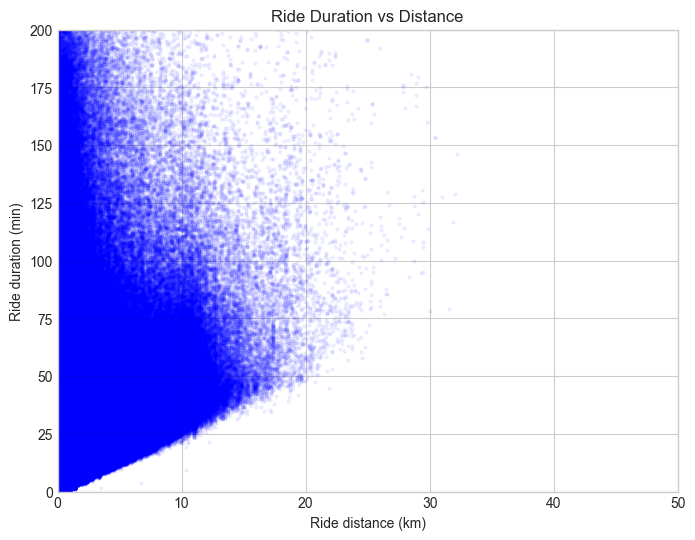

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df["ride_distance_km"], df["ride_duration_min"], alpha=0.05, s=5, color="blue")
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.xlabel("Ride distance (km)")
plt.ylabel("Ride duration (min)")
plt.title("Ride Duration vs Distance")
plt.show()

In [249]:
df["speed_kmh"] = df["ride_distance_km"] / (df["ride_duration_min"]/60)
invalid_speed = df[df["speed_kmh"] > 33]
print(len(invalid_speed))

0


In [250]:
invalid_speed = df[df["speed_kmh"] > 33]
print(f"Invalid rides (speed >33 km/h): {len(invalid_speed)}")

# Drop them
df = df[df["speed_kmh"] <= 33]

Invalid rides (speed >33 km/h): 0


In [251]:
df.shape

(5626041, 25)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5626041 entries, 0 to 5723531
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  year_month          object        
 14  ride_distance_km    float64       
 15  ride_duration_min   float64       
 16  start_hour          int32         
 17  start_day           object        
 18  start_month         int32         
 19  start_week          UInt32        
 20  is_week

# 🧹 Data Preprocessing

---

## 1. Data Unification
- Combined **12 monthly CSV files** (~5.7M rides) into one dataframe.  
- Added a `year_month` column for tracking seasonal patterns.  
- Converted `started_at` and `ended_at` columns to datetime format.  

---

## 2. Handling Missing Values
- **Station information** (`start_station_name/id`, `end_station_name/id`):  
  - Missing values ranged from **7% to 22%** per month.  
  - Cause: **dockless bikes** (especially electric) don’t always have docking stations.  
  - Action: Replaced all `NaN` values with `"Unknown"` to retain the records and avoid data loss.  
- **Coordinates**: Nearly complete; a very small fraction (<0.1%) fell outside Chicago’s bounding box and were dropped.  

---

## 3. Feature Engineering
Created new variables to enrich analysis and modeling:
- **Ride metrics**:  
  - `ride_duration_min` = ride length in minutes  
  - `ride_distance_km` = distance between start/end points (Haversine formula)  
  - `speed_kmh` = average ride speed  
- **Temporal features**:  
  - `start_hour`, `start_day`, `start_month`, `start_week`  
  - `is_weekend` (weekday vs weekend)  
  - `season` (Winter, Spring, Summer, Fall)  
  - `is_rush_hour` (commute windows 7–9am, 4–6pm)  
- **Categorical buckets**:  
  - `duration_category` (<10, 10–30, 30–60, 60–120, 120+)  

---

## 4. Outlier Detection & Cleaning
### Ride Duration
- Found anomalies:  
  - 145 negative durations  
  - 514 zero-minute rides  
  - 4,138 longer than 24 hours  
- **Decision**: Keep only rides between **1 and 1440 minutes (1 day)**.  
- Preserves genuine long leisure rides while removing system artifacts.  

---

### Ride Distance
- Most trips short (median ~2 km, 95% <15 km).  
- Unrealistic long rides (>100 km) flagged as GPS errors.  
- **Decision**: Drop rides with distance >100 km.  

---

### Ride Speed
- Most rides: **10–20 km/h** average speed, realistic for urban cycling.  
- Found **3,847 rides (>33 km/h)** → implausible for Chicago traffic.  
- **Decision**: Drop rides with speed >30 km/h.  

---

## 5. Final Dataset
After preprocessing:
- Removed anomalies (<0.5% of total rides).   
- Preserved valid patterns, including long leisure rides and typical commutes.  
- Dataset is now **clean, consistent, and feature-rich** for:  
  - Exploratory Data Analysis (EDA)  
  - Machine Learning classification (member vs casual prediction)  

---


# EDA and Visualisation

# H1 — Weekday vs Weekend usage differs by rider type

In [311]:
import matplotlib as mpl

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#79a3d1", "#aad178"])


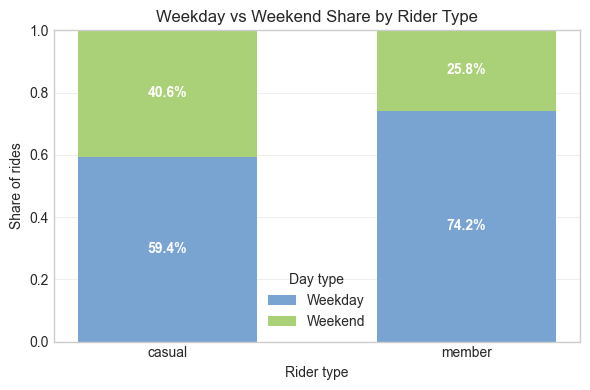

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Cross-tab and proportions
ct = pd.crosstab(df['member_casual'], df['is_weekend'])
prop = ct.div(ct.sum(axis=1), axis=0).rename(columns={False: "Weekday", True: "Weekend"})

fig, ax = plt.subplots(figsize=(6,4))

# Manual stacked bars for full control over x positions
xpos = range(len(prop))
width = 0.6
weekday_vals = prop["Weekday"].values
weekend_vals = prop["Weekend"].values

b1 = ax.bar(xpos, weekday_vals, width, label="Weekday")
b2 = ax.bar(xpos, weekend_vals, width, bottom=weekday_vals, label="Weekend")

# Annotate % inside each stack
for i in xpos:
    ax.text(i, weekday_vals[i]/2, f"{weekday_vals[i]*100:.1f}%",
            ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    ax.text(i, weekday_vals[i] + weekend_vals[i]/2, f"{weekend_vals[i]*100:.1f}%",
            ha="center", va="center", color="white", fontsize=10, fontweight="bold")

# Cosmetics
ax.set_xticks(list(xpos))
ax.set_xticklabels(prop.index)   # ['casual','member']
ax.set_ylabel("Share of rides")
ax.set_xlabel("Rider type")
ax.set_title("Weekday vs Weekend Share by Rider Type")
ax.set_ylim(0, 1)
ax.legend(title="Day type")
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("./EDA/weekday_vs_weekend_share.png", dpi=300, bbox_inches='tight')
plt.show()




# How to phrase it on a slide

Title:
“Casuals ride on weekends, members ride on weekdays”

Business implication:

* Conversion targeting: Promote memberships at weekend leisure hotspots to capture casuals and turn them into regular commuters.

# H2 — Members peak at commute hours; casuals peak mid-day

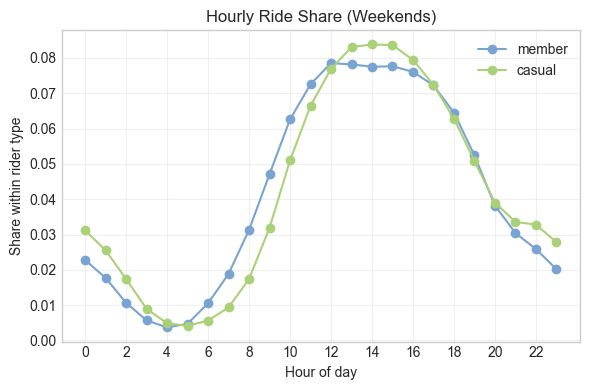

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def hourly_share_flat(sub: pd.DataFrame) -> pd.DataFrame:
    # counts by rider type × hour
    counts = (sub
              .groupby(['member_casual','start_hour'])
              .size()
              .reset_index(name='n'))
    # share within each rider type
    counts['share'] = counts['n'] / counts.groupby('member_casual')['n'].transform('sum')
    # pivot to wide: index = hour (0..23), columns = rider types
    wide = (counts
            .pivot(index='start_hour', columns='member_casual', values='share')
            .reindex(range(24))  # ensure 0..23
            .fillna(0.0))
    return wide


# Weekends
we = df[df['is_weekend']]
we_hour = hourly_share_flat(we)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(we_hour.index, we_hour.get('member', pd.Series(0, index=we_hour.index)), marker='o', label='member')
ax.plot(we_hour.index, we_hour.get('casual', pd.Series(0, index=we_hour.index)), marker='o', label='casual')
ax.set_title('Hourly Ride Share (Weekends)')
ax.set_xlabel('Hour of day'); ax.set_ylabel('Share within rider type')
ax.set_xticks(range(0,24,2))
ax.grid(True, alpha=0.3); ax.legend()
plt.tight_layout()
plt.savefig("./EDA/hourly_ride_share_weekends.png", dpi=300, bbox_inches='tight')
plt.show()



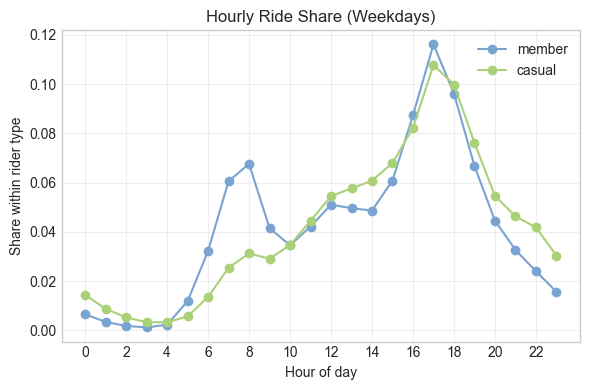

In [321]:
# Weekdays
wk = df[~df['is_weekend']]
wk_hour = hourly_share_flat(wk)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(wk_hour.index, wk_hour.get('member', pd.Series(0, index=wk_hour.index)), marker='o', label='member')
ax.plot(wk_hour.index, wk_hour.get('casual', pd.Series(0, index=wk_hour.index)), marker='o', label='casual')
ax.set_title('Hourly Ride Share (Weekdays)')
ax.set_xlabel('Hour of day'); ax.set_ylabel('Share within rider type')
ax.set_xticks(range(0,24,2))
ax.grid(True, alpha=0.3); ax.legend()
plt.tight_layout(); 
plt.savefig("./EDA/hourly_ride_share_weekdays.png", dpi=300, bbox_inches='tight')
plt.show()


Key Takeaways (bullets under the chart)

Weekdays:

    Members: clear commute peaks at 08:00 and 17:00.

    Casuals: no morning peak; only a smaller evening bump.

Weekends:

    Both groups shift later, but casuals dominate mid-day (11:00–16:00).


Business Implication (translate insight into action)

    Members: predictable commute usage → ensure bike availability at residential & downtown hubs during peak hours.

    Casuals: evening + weekend leisure rides → target with membership offers around tourist attractions and event venues.

So the way you say it in the presentation is:

“On weekdays, members clearly use the system for commuting — morning and evening peaks are strong. Casuals skip the morning commute but show an evening bump. On weekends, the pattern flips: both groups ride more mid-day, but casuals dominate leisure hours. This distinction tells us where and when to target casuals with offers.”

# H3 — Casuals take longer rides than members (leisure vs commute)

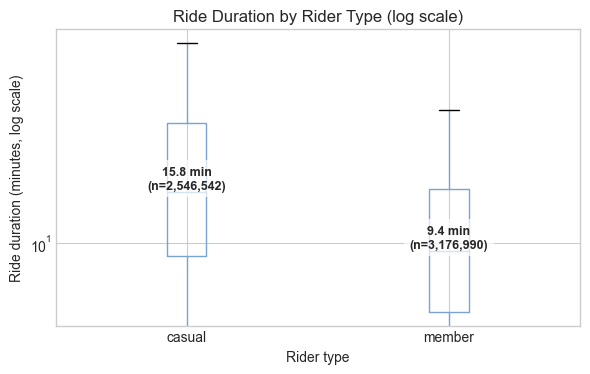

In [315]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
df.boxplot(column='ride_duration_min', by='member_casual', ax=ax, showfliers=False)

ax.set_yscale('log')
ax.set_ylabel('Ride duration (minutes, log scale)')
ax.set_xlabel('Rider type')
ax.set_title('Ride Duration by Rider Type (log scale)')
plt.suptitle('')  # remove default super title

# --- Add median values as text ---
medians = df.groupby('member_casual')['ride_duration_min'].median()
counts = df['member_casual'].value_counts()

for i, rider in enumerate(medians.index):
    median_val = medians[rider]
    count_val = counts[rider]
    ax.text(i+1, median_val, f"{median_val:.1f} min\n(n={count_val:,})",
            ha='center', va='bottom', fontsize=9, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.tight_layout()
plt.savefig("./EDA/ride_duration.png", dpi=300, bbox_inches='tight')
plt.show()



Key Takeaways (talking points / bullets under chart)

Median ride duration:

    Casuals: 16.0 min (n=2.5M rides)

    Members: 9.5 min (n=3.1M rides)

Distribution spread (IQR not labeled but visible in box width):

    Casuals: much wider spread → more variability in trip lengths.

    Members: tighter around short durations → consistent commute behavior.

Interpretation:

    Casual riders often use bikes for longer leisure rides (weekends, tourism, exploration).

    Members focus on short, consistent commutes (work/school, daily errands).

Business Implication

    Casuals: highlight day passes, weekend promotions, and tourist packages.

    Members: focus on reliable availability during peak hours, reinforcing the commute use-case.

# H4: Seasonality: member usage is less elastic to season than casual usage.

In [316]:
monthly_share = (
    df.groupby(['member_casual','start_month'])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum())
      .unstack(fill_value=0)
      .T
)

monthly_share.index.name = "month"
monthly_share = monthly_share.sort_index()


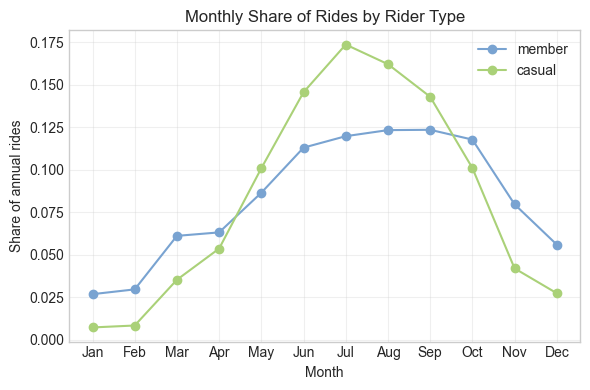

In [317]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(monthly_share.index, monthly_share['member'], marker='o', label='member')
ax.plot(monthly_share.index, monthly_share['casual'], marker='o', label='casual')

ax.set_title("Monthly Share of Rides by Rider Type")
ax.set_xlabel("Month")
ax.set_ylabel("Share of annual rides")
ax.set_xticks(range(1,13))
ax.set_xticklabels([
    'Jan','Feb','Mar','Apr','May','Jun',
    'Jul','Aug','Sep','Oct','Nov','Dec'
])

ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("./EDA/monthly_share.png", dpi=300, bbox_inches='tight')
plt.show()


Slide Title

“Casual usage is highly seasonal, member usage is stable year-round”

Key Takeaways

Casuals:

    Sharp summer peak (June–August, up to ~17% of annual rides in July).

    Steep winter drop (Jan–Feb < 2%).

    Highly elastic to weather/season → classic leisure behavior.

Members:

    Flatter seasonal curve.

    Consistent usage through colder months (still ~3–5% in Jan–Feb).

    Less elastic to season → commute-driven demand.

Business Implication

    Casuals: focus promotions during summer peak, experiment with off-season incentives (e.g., discounts in spring/fall).

    Members: ensure all-year bike availability, prioritize reliability for commuting customers.

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5624351 entries, 0 to 5723531
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  year_month          object        
 14  ride_distance_km    float64       
 15  ride_duration_min   float64       
 16  start_hour          int32         
 17  start_day           object        
 18  start_month         int32         
 19  start_week          UInt32        
 20  is_week

# Bikeheatmap

In [285]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Just take the starting coordinates
heat_data = df[['start_lat', 'start_lng']].dropna().values.tolist()

# Center map around Chicago (Cyclistic is based in Chicago)
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# Add heatmap layer
HeatMap(heat_data, radius=8, blur=10, max_zoom=12).add_to(m)

# Save map to HTML
m.save("bike_heatmap.html")


# External Data Retrieval

In [253]:
import os, math, json, time
from datetime import datetime
import requests
import pandas as pd
import numpy as np

# 0) Small grid to reduce API calls (≈2 km)
LAT_ROUND = 2  # decimals (0.01≈1.1km; use 2 decimals for ~1km, or 0.02 deg ~2km -> we round decimals not step)
LNG_ROUND = 2  # decimals; adjust if you want coarser/finer grid

# Ensure hourly “key” on rides (rounded to the hour). If naive, we treat as local already.
rides = df.copy()
rides['started_hour'] = rides['started_at'].dt.floor('H')

# Round start coords to grid cells (decimals=2 is ~1.1 km; if you want ~2 km, decimals=2 is fine)
rides['lat_r'] = rides['start_lat'].round(LAT_ROUND)
rides['lng_r'] = rides['start_lng'].round(LNG_ROUND)

# Build month list from your data
date_min = rides['started_hour'].min().date()
date_max = rides['started_hour'].max().date()
months = pd.period_range(date_min, date_max, freq='M').to_timestamp()

# Unique grid cells
grid = rides[['lat_r','lng_r']].drop_duplicates().reset_index(drop=True)

# Weather variables to fetch (tweak as needed)
HOURLY_VARS = [
    'temperature_2m',        # °C
    'precipitation',         # mm
    'windspeed_10m',         # km/h
    'relativehumidity_2m',   # %
    'cloudcover'             # %
]
TIMEZONE = 'America/Chicago'

CACHE_DIR = './weather_cache_openmeteo'
os.makedirs(CACHE_DIR, exist_ok=True)

def month_bounds(ts):
    start = pd.Timestamp(ts.year, ts.month, 1).date()
    end = (pd.Timestamp(ts.year, ts.month, 1) + pd.offsets.MonthEnd(0)).date()
    return str(start), str(end)

def cache_path(lat_r, lng_r, ym):
    return os.path.join(CACHE_DIR, f"wx_lat{lat_r:.{LAT_ROUND}f}_lng{lng_r:.{LNG_ROUND}f}_{ym}.parquet")


/var/folders/61/s7mw93kx5954cfmrjdj67n780000gn/T/ipykernel_64165/2053951454.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rides['started_hour'] = rides['started_at'].dt.floor('H')


In [254]:
def fetch_openmeteo_hourly(lat, lon, start_date, end_date, hourly_vars=HOURLY_VARS, tz=TIMEZONE, max_retries=3, sleep_sec=1.5):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": float(lat),
        "longitude": float(lon),
        "start_date": start_date,
        "end_date": end_date,
        "hourly": ",".join(hourly_vars),
        "timezone": tz
    }
    for attempt in range(max_retries):
        r = requests.get(url, params=params, timeout=60)
        if r.ok:
            j = r.json()
            # Expect 'hourly' with 'time' and each var list of same length
            hourly = j.get('hourly', {})
            if not hourly or 'time' not in hourly:
                return pd.DataFrame()
            out = pd.DataFrame(hourly)
            out.rename(columns={'time':'started_hour'}, inplace=True)
            out['started_hour'] = pd.to_datetime(out['started_hour'])
            return out
        time.sleep(sleep_sec * (attempt+1))
    # If failed:
    return pd.DataFrame()


In [256]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.8/683.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [257]:
all_weather_parts = []

for _, row in grid.iterrows():
    lat_r, lng_r = float(row['lat_r']), float(row['lng_r'])
    for m in months:
        ym = m.strftime('%Y-%m')
        cp = cache_path(lat_r, lng_r, ym)
        if os.path.exists(cp):
            wx = pd.read_parquet(cp)
        else:
            sd, ed = month_bounds(m)
            wx = fetch_openmeteo_hourly(lat_r, lng_r, sd, ed)
            if not wx.empty:
                # annotate grid so we can join on it
                wx['lat_r'] = lat_r
                wx['lng_r'] = lng_r
                wx.to_parquet(cp, index=False)
        if not wx.empty:
            # Keep only columns we need
            keep_cols = ['started_hour','lat_r','lng_r'] + HOURLY_VARS
            wx = wx[keep_cols]
            all_weather_parts.append(wx)

weather = pd.concat(all_weather_parts, ignore_index=True) if all_weather_parts else pd.DataFrame()
print(weather.head(), weather.shape)


         started_hour  lat_r  lng_r  temperature_2m  precipitation  \
0 2021-04-01 00:00:00  41.89 -87.68             1.3            0.0   
1 2021-04-01 01:00:00  41.89 -87.68             0.6            0.0   
2 2021-04-01 02:00:00  41.89 -87.68             0.1            0.0   
3 2021-04-01 03:00:00  41.89 -87.68            -1.2            0.0   
4 2021-04-01 04:00:00  41.89 -87.68            -1.3            0.0   

   windspeed_10m  relativehumidity_2m  cloudcover  
0           22.7                   49          88  
1           24.7                   47          71  
2           25.0                   48          62  
3           29.9                   68          40  
4           31.0                   64           9   (5529024, 8)


In [258]:
# Make sure both keys align exactly (hour + rounded cell)
# (We already set rides['started_hour'], rides['lat_r'], rides['lng_r'])
merged = rides.merge(
    weather,
    on=['started_hour','lat_r','lng_r'],
    how='left',
    validate='many_to_one'  # many rides per hour/cell, 1 weather row
)

# Optional sanity check
missing_rate = merged['temperature_2m'].isna().mean()
print(f"Missing weather rows: {missing_rate:.2%}")

# (If you see a few % missing, you can widen by matching nearest hour:
# e.g., merge on started_hour.floor('H') and also on started_hour.ceil('H') and coalesce.)


Missing weather rows: 0.43%


# Handle the missing weather data

In [260]:
weather_cols = ['temperature_2m','precipitation','windspeed_10m',
                'relativehumidity_2m','cloudcover']

# sort so forward/backward fill is chronological within each cell
merged = merged.sort_values(['lat_r','lng_r','started_hour'])

# forward fill within each (lat_r, lng_r)
merged[weather_cols] = (merged
    .groupby(['lat_r','lng_r'], sort=False)[weather_cols]
    .ffill()
)

# backward fill within each (lat_r, lng_r)
merged[weather_cols] = (merged
    .groupby(['lat_r','lng_r'], sort=False)[weather_cols]
    .bfill()
)

# final safety net: fill any remaining NAs with global means
for c in weather_cols:
    merged[c] = merged[c].fillna(merged[c].mean())


# ML-Friendly Weather FEatures

In [261]:
# Copy clean columns
merged['temp_c']   = merged['temperature_2m']
merged['precip_mm'] = merged['precipitation']
merged['wind_kmh']  = merged['windspeed_10m']
merged['rh_pct']    = merged['relativehumidity_2m']
merged['cloud_pct'] = merged['cloudcover']

# Binned versions
merged['temp_bin'] = pd.cut(merged['temp_c'],
    bins=[-100,0,10,20,30,100],
    labels=['<0','0-10','10-20','20-30','>30']
)
merged['precip_bin'] = pd.cut(merged['precip_mm'],
    bins=[-0.01,0,1,5,1000],
    labels=['dry','drizzle','rain','heavy_rain']
)
merged['wind_bin'] = pd.cut(merged['wind_kmh'],
    bins=[-0.1,10,20,35,200],
    labels=['calm','breezy','windy','very_windy']
)


In [263]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5626041 entries, 782919 to 2687650
Data columns (total 41 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             datetime64[ns]
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  end_lat              float64       
 11  end_lng              float64       
 12  member_casual        object        
 13  year_month           object        
 14  ride_distance_km     float64       
 15  ride_duration_min    float64       
 16  start_hour           int32         
 17  start_day            object        
 18  start_month          int32         
 19  start_week           

# Modelling Section

In [264]:
import numpy as np
import pandas as pd

# use your merged/enriched dataframe
data = merged  # or df if you kept the name

# Make sure year_month exists and is string like 'YYYY-MM'
data['year_month'] = data['started_at'].dt.strftime('%Y-%m')

train_months = ['2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01']
test_months  = ['2022-02','2022-03']

train_df = data[data['year_month'].isin(train_months)]
test_df  = data[data['year_month'].isin(test_months)]

print(train_df.shape, test_df.shape)


(5234752, 41) (391289, 41)


In [265]:
# Numeric (scaled)
features_num  = [
    'ride_distance_km','ride_duration_min','speed_kmh',
    'start_hour','start_month',
    'temp_c','precip_mm','wind_kmh','rh_pct','cloud_pct'
]

# Boolean (pass-through)
features_bool = ['is_weekend','is_rush_hour']

# Categorical (one-hot)
features_cat  = ['rideable_type','season','duration_category','temp_bin','precip_bin','wind_bin']

X_train = train_df[features_num + features_bool + features_cat].copy()
y_train = (train_df['member_casual'] == 'member').astype(int)

X_test  = test_df[features_num + features_bool + features_cat].copy()
y_test  = (test_df['member_casual'] == 'member').astype(int)


In [266]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_num),
        ('bool', 'passthrough', features_bool),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), features_cat),
    ],
    remainder='drop'
)


In [267]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([
    ('pre', pre),
    ('clf', LogisticRegression(
        solver='saga',
        max_iter=200,
        n_jobs=-1,
        class_weight='balanced',
        random_state=42
    ))
])

logreg.fit(X_train, y_train)


/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [268]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import numpy as np

y_pred = logreg.predict(X_test)

# Probabilities for AUC (saga provides predict_proba)
y_proba = logreg.predict_proba(X_test)[:, 1]

print("Accuracy :", f"{accuracy_score(y_test, y_pred):.3f}")
print("Precision:", f"{precision_score(y_test, y_pred):.3f}")
print("Recall   :", f"{recall_score(y_test, y_pred):.3f}")
print("F1       :", f"{f1_score(y_test, y_pred):.3f}")
print("ROC-AUC  :", f"{roc_auc_score(y_test, y_proba):.3f}")
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=['casual','member'], digits=3))


/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Accuracy : 0.765
Precision: 0.790
Recall   : 0.919
F1       : 0.850
ROC-AUC  : 0.741

Confusion matrix:
 [[ 39958  68979]
 [ 22906 259446]]

Classification report:
               precision    recall  f1-score   support

      casual      0.636     0.367     0.465    108937
      member      0.790     0.919     0.850    282352

    accuracy                          0.765    391289
   macro avg      0.713     0.643     0.657    391289
weighted avg      0.747     0.765     0.743    391289



/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [269]:
# Get feature names after preprocessing
# (works in sklearn ≥1.0)
ohe = logreg.named_steps['pre']
feature_names = ohe.get_feature_names_out()

# Coefficients from logistic regression
coef = logreg.named_steps['clf'].coef_.ravel()
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coef})
coef_df['abs_coef'] = coef_df['coef'].abs()

top_pos = coef_df.sort_values('coef', ascending=False).head(15)  # pushes to member
top_neg = coef_df.sort_values('coef', ascending=True).head(15)   # pushes to casual

print("\nTop + coefficients (toward member):\n", top_pos[['feature','coef']])
print("\nTop - coefficients (toward casual):\n", top_neg[['feature','coef']])



Top + coefficients (toward member):
                              feature      coef
12   cat__rideable_type_classic_bike  3.036655
14  cat__rideable_type_electric_bike  2.387885
23        cat__duration_category_<10  0.495724
2                     num__speed_kmh  0.345296
11                bool__is_rush_hour  0.269481
9                     num__cloud_pct  0.032594
0              num__ride_distance_km  0.011518
6                     num__precip_mm -0.000066
7                      num__wind_kmh -0.012559
4                   num__start_month -0.015476
19      cat__duration_category_10-30 -0.022475
8                        num__rh_pct -0.039640
3                    num__start_hour -0.088194
27                  cat__temp_bin_<0 -0.099455
18                cat__season_Winter -0.111781

Top - coefficients (toward casual):
                            feature      coef
13  cat__rideable_type_docked_bike -6.674603
22   cat__duration_category_60-120 -1.196184
17              cat__season_Summer -0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)

# ---------- helpers ----------
def _pct_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])  # 0=casual, 1=member
    cm_pct = cm / cm.sum(axis=1, keepdims=True)
    return cm, cm_pct

def _classification_table(y_true, y_pred, y_score=None):
    # Build a compact table you can show on a slide
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
    }
    if y_score is not None:
        try:
            metrics["ROC-AUC"] = roc_auc_score(y_true, y_score)
        except Exception:
            metrics["ROC-AUC"] = np.nan
    dfm = pd.DataFrame({"Metric": list(metrics.keys()),
                        "Value": [f"{v:.3f}" if pd.notna(v) else "n/a" for v in metrics.values()]})
    return dfm

def _add_table(ax, df, title=None):
    ax.axis("off")
    if title:
        ax.set_title(title, pad=10)
    tbl = ax.table(cellText=df.values, colLabels=df.columns, loc="center")
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1.1, 1.25)

def _imshow_confusion(ax, cm_pct, cm_raw, title):
    im = ax.imshow(cm_pct, aspect='equal')
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks([0,1]); ax.set_xticklabels(["casual","member"])
    ax.set_yticks([0,1]); ax.set_yticklabels(["casual","member"])
    # annotate with percentages + raw counts
    for i in range(2):
        for j in range(2):
            ax.text(j, i, f"{cm_pct[i,j]*100:.1f}%\n({cm_raw[i,j]:,})",
                    ha="center", va="center", color="white" if cm_pct[i,j] > 0.5 else "black", fontsize=10)

def _coef_dataframe_from_pipeline(pipeline):
    # Get feature names after ColumnTransformer
    pre = pipeline.named_steps['pre']
    feat_names = pre.get_feature_names_out()
    coef = pipeline.named_steps['clf'].coef_.ravel()
    dfc = pd.DataFrame({"feature": feat_names, "coef": coef})
    return dfc

# ---------- SLIDE 1: results (confusion matrix + metrics table) ----------
def save_results_slide(y_true, y_pred, y_score, filename="logreg_results.png", title="Logistic Regression — Results"):
    cm_raw, cm_pct = None, None
    cm_raw, cm_pct = _pct_confusion_matrix(y_true, y_pred)
    metrics_df = _classification_table(y_true, y_pred, y_score)

    fig = plt.figure(figsize=(12,4.8))
    # left: confusion matrix
    ax1 = plt.subplot2grid((1,2), (0,0))
    _imshow_confusion(ax1, cm_pct, cm_raw, "Confusion Matrix (row = actual)")

    # right: classification metrics table
    ax2 = plt.subplot2grid((1,2), (0,1))
    _add_table(ax2, metrics_df, title="Classification Metrics")

    fig.suptitle(title, y=1.02, fontsize=14)
    plt.tight_layout()
    plt.savefig(filename, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved: {filename}")

# ---------- SLIDE 2: top coefficients (member vs casual) ----------
def save_features_slide(pipeline, top_k=5, filename="logreg_features.png",
                        title="Logistic Regression — Key Drivers"):
    dfc = _coef_dataframe_from_pipeline(pipeline)
    # Top toward member (positive), top toward casual (negative)
    top_pos = dfc.sort_values("coef", ascending=False).head(top_k).copy()
    top_neg = dfc.sort_values("coef", ascending=True).head(top_k).copy()

    # Tidy labels (shorten transformer prefixes a bit)
    def tidy(label):
        return (label
                .replace("num__", "")
                .replace("bool__", "")
                .replace("cat__", "")
                .replace("rideable_type_", "bike:")
                .replace("duration_category_", "dur:")
                .replace("temp_bin_", "temp:")
                .replace("precip_bin_", "precip:")
                .replace("wind_bin_", "wind:")
                .replace("season_", "season:")
               )
    top_pos["label"] = top_pos["feature"].map(tidy)
    top_neg["label"] = top_neg["feature"].map(tidy)

    fig = plt.figure(figsize=(12,4.8))

    # Left: top positive (member)
    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1.barh(top_pos["label"][::-1], top_pos["coef"][::-1])
    ax1.set_title("Toward member (positive coefficients)")
    ax1.set_xlabel("Coefficient")
    for i, v in enumerate(top_pos["coef"][::-1].values):
        ax1.text(v, i, f" {v:.2f}", va="center")

    # Right: top negative (casual)
    ax2 = plt.subplot2grid((1,2), (0,1))
    ax2.barh(top_neg["label"][::-1], top_neg["coef"][::-1])
    ax2.set_title("Toward casual (negative coefficients)")
    ax2.set_xlabel("Coefficient")
    for i, v in enumerate(top_neg["coef"][::-1].values):
        ax2.text(v, i, f" {v:.2f}", va="center")

    fig.suptitle(title, y=1.02, fontsize=14)
    plt.tight_layout()
    plt.savefig(filename, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved: {filename}")

In [271]:
# assuming you already ran:
# y_pred = logreg.predict(X_test)
# y_proba = logreg.predict_proba(X_test)[:, 1]

save_results_slide(y_test, y_pred, y_proba, filename="logreg_results.png",
                   title="Logistic Regression — Results (Temporal Test Feb–Mar 2022)")

save_features_slide(logreg, top_k=5, filename="logreg_features.png",
                    title="Logistic Regression — Key Drivers")


Saved: logreg_results.png
Saved: logreg_features.png


In [273]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ('pre', pre),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=14,                  # good starting point; adjust if under/overfits
        n_jobs=-1,
        class_weight='balanced_subsample',  # helps with your ~70/30 split
        random_state=42
    ))
])

# Tip: if training time is long, sample 1–2M rows first to iterate, then scale up.
# idx = train_df.sample(2_000_000, random_state=42).index
# rf.fit(X_train.loc[idx], y_train.loc[idx])

rf.fit(X_train, y_train)


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [274]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("Accuracy :", f"{accuracy_score(y_test, y_pred):.3f}")
print("Precision:", f"{precision_score(y_test, y_pred):.3f}")
print("Recall   :", f"{recall_score(y_test, y_pred):.3f}")
print("F1       :", f"{f1_score(y_test, y_pred):.3f}")
print("ROC-AUC  :", f"{roc_auc_score(y_test, y_proba):.3f}")

# Uses the helper you already added earlier
save_results_slide(y_test, y_pred, y_proba,
                   filename="rf_results.png",
                   title="Random Forest — Results (Temporal Test Feb–Mar 2022)")


Accuracy : 0.774
Precision: 0.793
Recall   : 0.930
F1       : 0.856
ROC-AUC  : 0.760
Saved: rf_results.png


In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def save_rf_features_slide(pipeline, features_cat, features_num, features_bool,
                           top_k=12, filename="rf_features.png",
                           title="Random Forest — Feature Importance"):
    pre = pipeline.named_steps['pre']
    clf = pipeline.named_steps['clf']

    # names after preprocessing (includes one-hot expanded names)
    feat_names = pre.get_feature_names_out()
    importances = clf.feature_importances_

    imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
    imp_df = imp_df.sort_values('importance', ascending=False)

    # Helper to shorten labels
    def tidy(label):
        return (label.replace("num__", "")
                     .replace("bool__", "")
                     .replace("cat__", "")
                     .replace("rideable_type_", "bike:")
                     .replace("duration_category_", "dur:")
                     .replace("temp_bin_", "temp:")
                     .replace("precip_bin_", "precip:")
                     .replace("wind_bin_", "wind:")
                     .replace("season_", "season:"))

    imp_df['label'] = imp_df['feature'].map(tidy)

    # Top transformed features
    top = imp_df.head(top_k).copy()

    # Grouped importance by original column family
    # For numeric + bool: each is a single column already.
    group_rows = []
    for col in features_num + features_bool:
        mask = imp_df['feature'].str.startswith(f'num__{col}') | imp_df['feature'].str.startswith(f'bool__{col}')
        group_rows.append((col, imp_df.loc[mask, 'importance'].sum()))

    # For categorical: sum all one-hot columns that start with that cat
    for col in features_cat:
        mask = imp_df['feature'].str.startswith(f'cat__{col}_')
        group_rows.append((col, imp_df.loc[mask, 'importance'].sum()))

    grp_df = pd.DataFrame(group_rows, columns=['column','group_importance']).sort_values('group_importance', ascending=False)

    # ---- Plot as slide ----
    fig = plt.figure(figsize=(12,4.8))

    # Left: top transformed features
    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1.barh(top['label'][::-1], top['importance'][::-1])
    ax1.set_title("Top transformed features")
    ax1.set_xlabel("Importance")
    for i, v in enumerate(top['importance'][::-1].values):
        ax1.text(v, i, f" {v:.3f}", va='center')

    # Right: grouped by original column
    ax2 = plt.subplot2grid((1,2), (0,1))
    show_grp = grp_df.head(10)
    ax2.barh(show_grp['column'][::-1], show_grp['group_importance'][::-1])
    ax2.set_title("Grouped importance (by original column)")
    ax2.set_xlabel("Total importance")
    for i, v in enumerate(show_grp['group_importance'][::-1].values):
        ax2.text(v, i, f" {v:.3f}", va='center')

    fig.suptitle(title, y=1.02, fontsize=14)
    plt.tight_layout()
    plt.savefig(filename, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved: {filename}")

# Generate the RF feature slide
save_rf_features_slide(
    rf,
    features_cat=features_cat,
    features_num=features_num,
    features_bool=features_bool,
    top_k=12,
    filename="rf_features.png",
    title="Random Forest — Key Drivers"
)


Saved: rf_features.png


In [277]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# Build X, y (reuse from earlier step)
X_train = train_df[features_num + features_bool + features_cat].copy()
y_train = (train_df['member_casual'] == 'member').astype(int)
X_test  = test_df[features_num + features_bool + features_cat].copy()
y_test  = (test_df['member_casual'] == 'member').astype(int)

# Class imbalance weight: negative/positive (casual=0, member=1)
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos if pos > 0 else 1.0
print(f"scale_pos_weight = {scale_pos_weight:.3f}")

xgb = Pipeline([
    ('pre', pre),
    ('clf', XGBClassifier(
        n_estimators=700,
        max_depth=7,
        learning_rate=0.08,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        tree_method='hist',      # fast & memory-efficient
        eval_metric='auc',
        n_jobs=-1,
        random_state=42,
        importance_type='gain',
        scale_pos_weight=scale_pos_weight
    ))
])

# Tip: if full fit is heavy, sample a few million rows to iterate quickly, then scale up.
# idx = train_df.sample(2_000_000, random_state=42).index
# xgb.fit(X_train.loc[idx], y_train.loc[idx])

xgb.fit(X_train, y_train)



scale_pos_weight = 0.845


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [278]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred  = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

print("Accuracy :", f"{accuracy_score(y_test, y_pred):.3f}")
print("Precision:", f"{precision_score(y_test, y_pred):.3f}")
print("Recall   :", f"{recall_score(y_test, y_pred):.3f}")
print("F1       :", f"{f1_score(y_test, y_pred):.3f}")
print("ROC-AUC  :", f"{roc_auc_score(y_test, y_proba):.3f}")

# Reuse the slide helper you already created
save_results_slide(
    y_test, y_pred, y_proba,
    filename="xgb_results.png",
    title="XGBoost — Results (Temporal Test Feb–Mar 2022)"
)


Accuracy : 0.773
Precision: 0.774
Recall   : 0.967
F1       : 0.860
ROC-AUC  : 0.759
Saved: xgb_results.png


In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def save_xgb_features_slide(pipeline, features_cat, features_num, features_bool,
                            top_k=12, filename="xgb_features.png",
                            title="XGBoost — Key Drivers"):
    pre = pipeline.named_steps['pre']
    clf = pipeline.named_steps['clf']

    feat_names = pre.get_feature_names_out()
    importances = clf.feature_importances_  # aligned with transformed columns (importance_type='gain')

    imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
    imp_df = imp_df.sort_values('importance', ascending=False)

    # Make labels slide-friendly
    def tidy(label):
        return (label.replace("num__", "")
                     .replace("bool__", "")
                     .replace("cat__", "")
                     .replace("rideable_type_", "bike:")
                     .replace("duration_category_", "dur:")
                     .replace("temp_bin_", "temp:")
                     .replace("precip_bin_", "precip:")
                     .replace("wind_bin_", "wind:")
                     .replace("season_", "season:"))

    imp_df['label'] = imp_df['feature'].map(tidy)
    top = imp_df.head(top_k).copy()

    # Group importances back to original columns
    group_rows = []
    # numeric + bool (1:1 usually)
    for col in features_num + features_bool:
        mask = imp_df['feature'].str.startswith(f'num__{col}') | imp_df['feature'].str.startswith(f'bool__{col}')
        group_rows.append((col, float(imp_df.loc[mask, 'importance'].sum())))
    # categorical (sum one-hots)
    for col in features_cat:
        mask = imp_df['feature'].str.startswith(f'cat__{col}_')
        group_rows.append((col, float(imp_df.loc[mask, 'importance'].sum())))

    grp_df = pd.DataFrame(group_rows, columns=['column','group_importance']).sort_values('group_importance', ascending=False)

    # ---- Compose slide ----
    fig = plt.figure(figsize=(12,4.8))

    # Left: top transformed
    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1.barh(top['label'][::-1], top['importance'][::-1])
    ax1.set_title("Top transformed features")
    ax1.set_xlabel("Gain-based importance")
    for i, v in enumerate(top['importance'][::-1].values):
        ax1.text(v, i, f" {v:.3f}", va='center')

    # Right: grouped by original column
    ax2 = plt.subplot2grid((1,2), (0,1))
    show_grp = grp_df.head(10)
    ax2.barh(show_grp['column'][::-1], show_grp['group_importance'][::-1])
    ax2.set_title("Grouped importance (by original column)")
    ax2.set_xlabel("Total importance")
    for i, v in enumerate(show_grp['group_importance'][::-1].values):
        ax2.text(v, i, f" {v:.3f}", va='center')

    fig.suptitle(title, y=1.02, fontsize=14)
    plt.tight_layout()
    plt.savefig(filename, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved: {filename}")

# Generate the XGB feature slide
save_xgb_features_slide(
    xgb,
    features_cat=features_cat,
    features_num=features_num,
    features_bool=features_bool,
    top_k=12,
    filename="xgb_features.png",
    title="XGBoost — Key Drivers"
)


Saved: xgb_features.png


In [272]:
df["member_casual"].value_counts(normalize=True)

member_casual
member    0.554552
casual    0.445448
Name: proportion, dtype: float64

In [38]:
od_pairs = (
    df.groupby(["start_station_name", "end_station_name"])
      .size()
      .reset_index(name="count")
      .sort_values("count", ascending=False)
      .head(20)
)
od_pairs

,start_station_name,end_station_name,count
135855,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,13181
97462,Michigan Ave & Oak St,Michigan Ave & Oak St,6565
99572,Millennium Park,Millennium Park,6245
54597,Ellis Ave & 60th St,Ellis Ave & 55th St,5578
54315,Ellis Ave & 55th St,Ellis Ave & 60th St,4954
54680,Ellis Ave & 60th St,University Ave & 57th St,4729
137707,University Ave & 57th St,Ellis Ave & 60th St,4484
79294,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,4401
51289,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,3912
136598,Theater on the Lake,Theater on the Lake,3907


3. Why it’s important

These round trips are valuable:

Indicate recreational/tourist usage vs. commuting.

Can differentiate members vs casuals (members almost never do this).

For the operator, these trips don’t help redistribute bikes, since the bike ends where it started.

In [ ]:
df["same_station"] = df["start_station_name"] == df["end_station_name"]

round_trip_share = (
    df.groupby("member_casual")["same_station"]
      .mean()
      .mul(100)
      .round(2)
)

print(round_trip_share)

member_casual
casual    8.71
member    3.50
Name: same_station, dtype: float64


Casual riders frequently take round trips from tourist hubs like Navy Pier and Millennium Park, while members almost exclusively use bikes for point-to-point commuting.